## Problem 4: Visual story telling part 2, Capital Metro data

In [1]:
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

In [2]:
cm_data = pd.read_csv("data/capmetro_UT.csv")

cm_data["timestamp"] = pd.to_datetime(cm_data["timestamp"])
cm_data = cm_data.set_index("timestamp")

In [3]:
cm_data.loc["2018-09-11"]

,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
timestamp,,,,,,,
2018-09-11 06:00:00,0,9,Tue,72.62,6,Sep,weekday
2018-09-11 06:15:00,8,18,Tue,72.62,6,Sep,weekday
2018-09-11 06:30:00,7,23,Tue,72.62,6,Sep,weekday
2018-09-11 06:45:00,3,17,Tue,72.62,6,Sep,weekday
2018-09-11 07:00:00,6,31,Tue,72.70,7,Sep,weekday
...,...,...,...,...,...,...,...
2018-09-11 20:45:00,45,4,Tue,75.79,20,Sep,weekday
2018-09-11 21:00:00,95,12,Tue,75.40,21,Sep,weekday
2018-09-11 21:15:00,41,8,Tue,75.40,21,Sep,weekday


Text(0.5, 0.98, 'Halloween Weekend Bus Ridership')

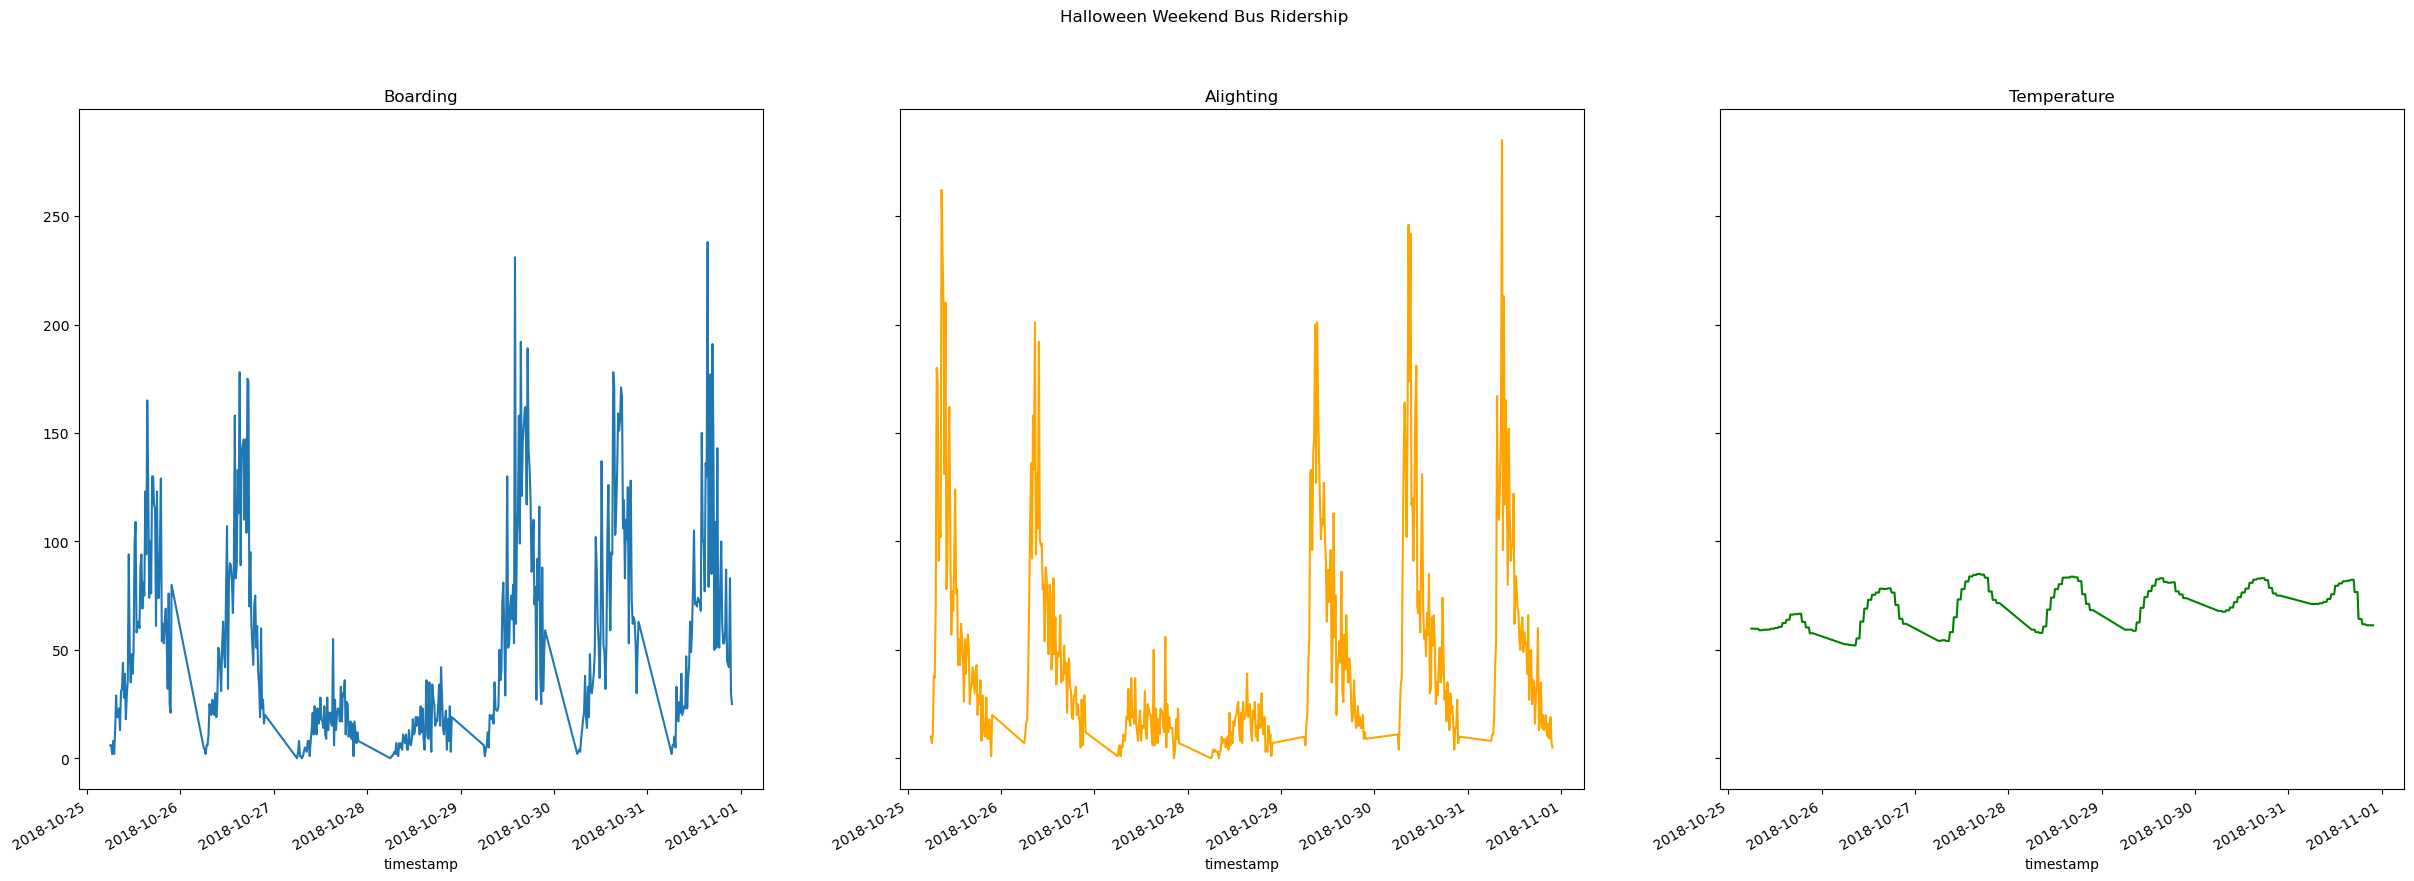

In [4]:
fig_1, (ax1, ax2, ax3) = subplots(nrows=1,
                           ncols=3,
                           sharey=True,
                           figsize=(30, 10))

cm_data["2018-10-25":"2018-10-31"]["boarding"].plot(ax=ax1, title="Boarding")
cm_data["2018-10-25":"2018-10-31"]["alighting"].plot(ax=ax2, title="Alighting", color="orange")
cm_data["2018-10-25":"2018-10-31"]["temperature"].plot(ax=ax3, title="Temperature", color="green")

fig_1.suptitle("Halloween Weekend Bus Ridership")

Text(0.5, 0.98, 'Average Month Bus Ridership')

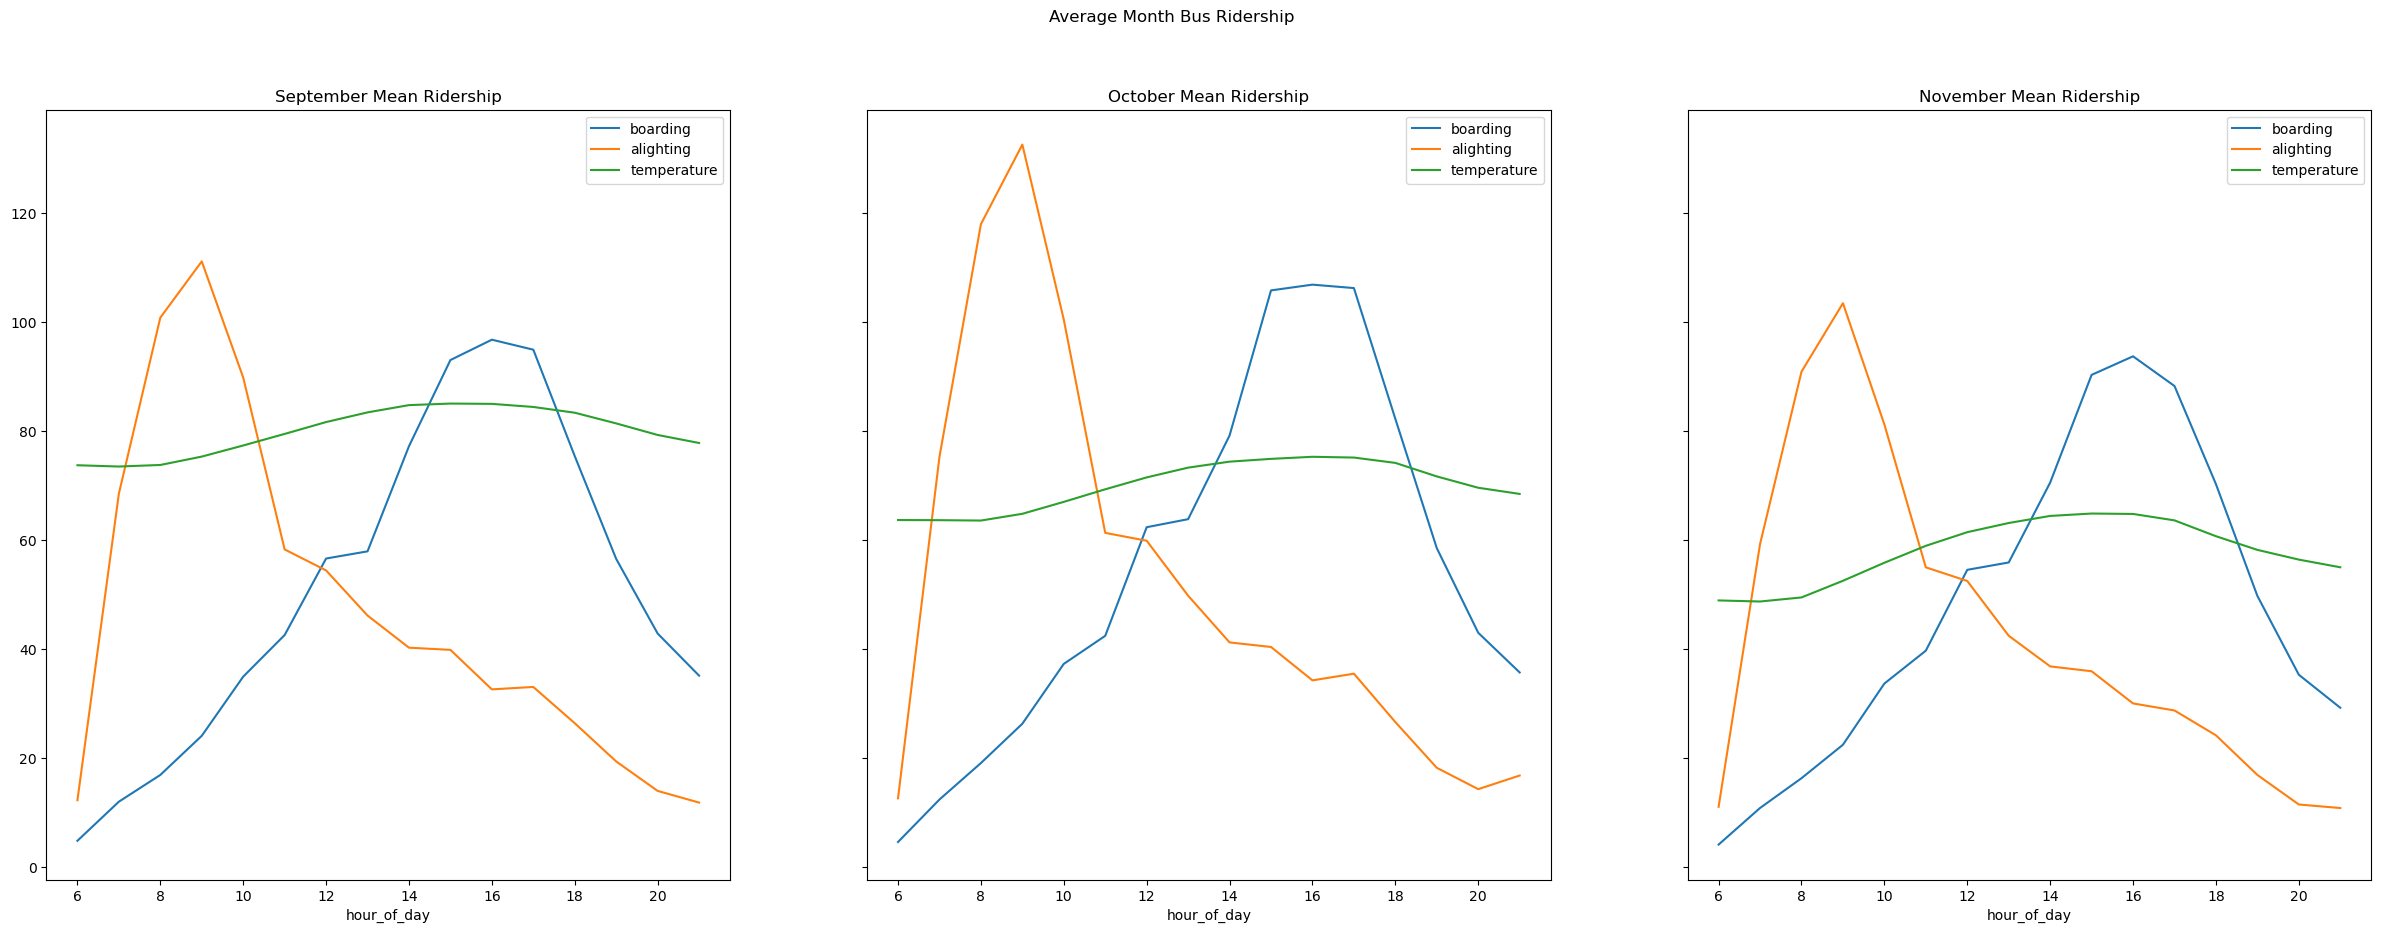

In [5]:
fig_1, (ax1, ax2, ax3) = subplots(nrows=1,
                           ncols=3,
                           sharey=True,
                           figsize=(30, 10))



september = cm_data[cm_data["month"] == "Sep"]
september.groupby("hour_of_day")[["boarding","alighting","temperature"]].mean().plot(title="September Mean Ridership", ax=ax1)
october = cm_data[cm_data["month"] == "Oct"]
october.groupby("hour_of_day")[["boarding","alighting","temperature"]].mean().plot(title="October Mean Ridership", ax=ax2)
november = cm_data[cm_data["month"] == "Nov"]
november.groupby("hour_of_day")[["boarding","alighting","temperature"]].mean().plot(title="November Mean Ridership", ax=ax3)

fig_1.suptitle("Average Month Bus Ridership")

Text(0.5, 0.98, 'Halloween Weekend Bus Ridership')

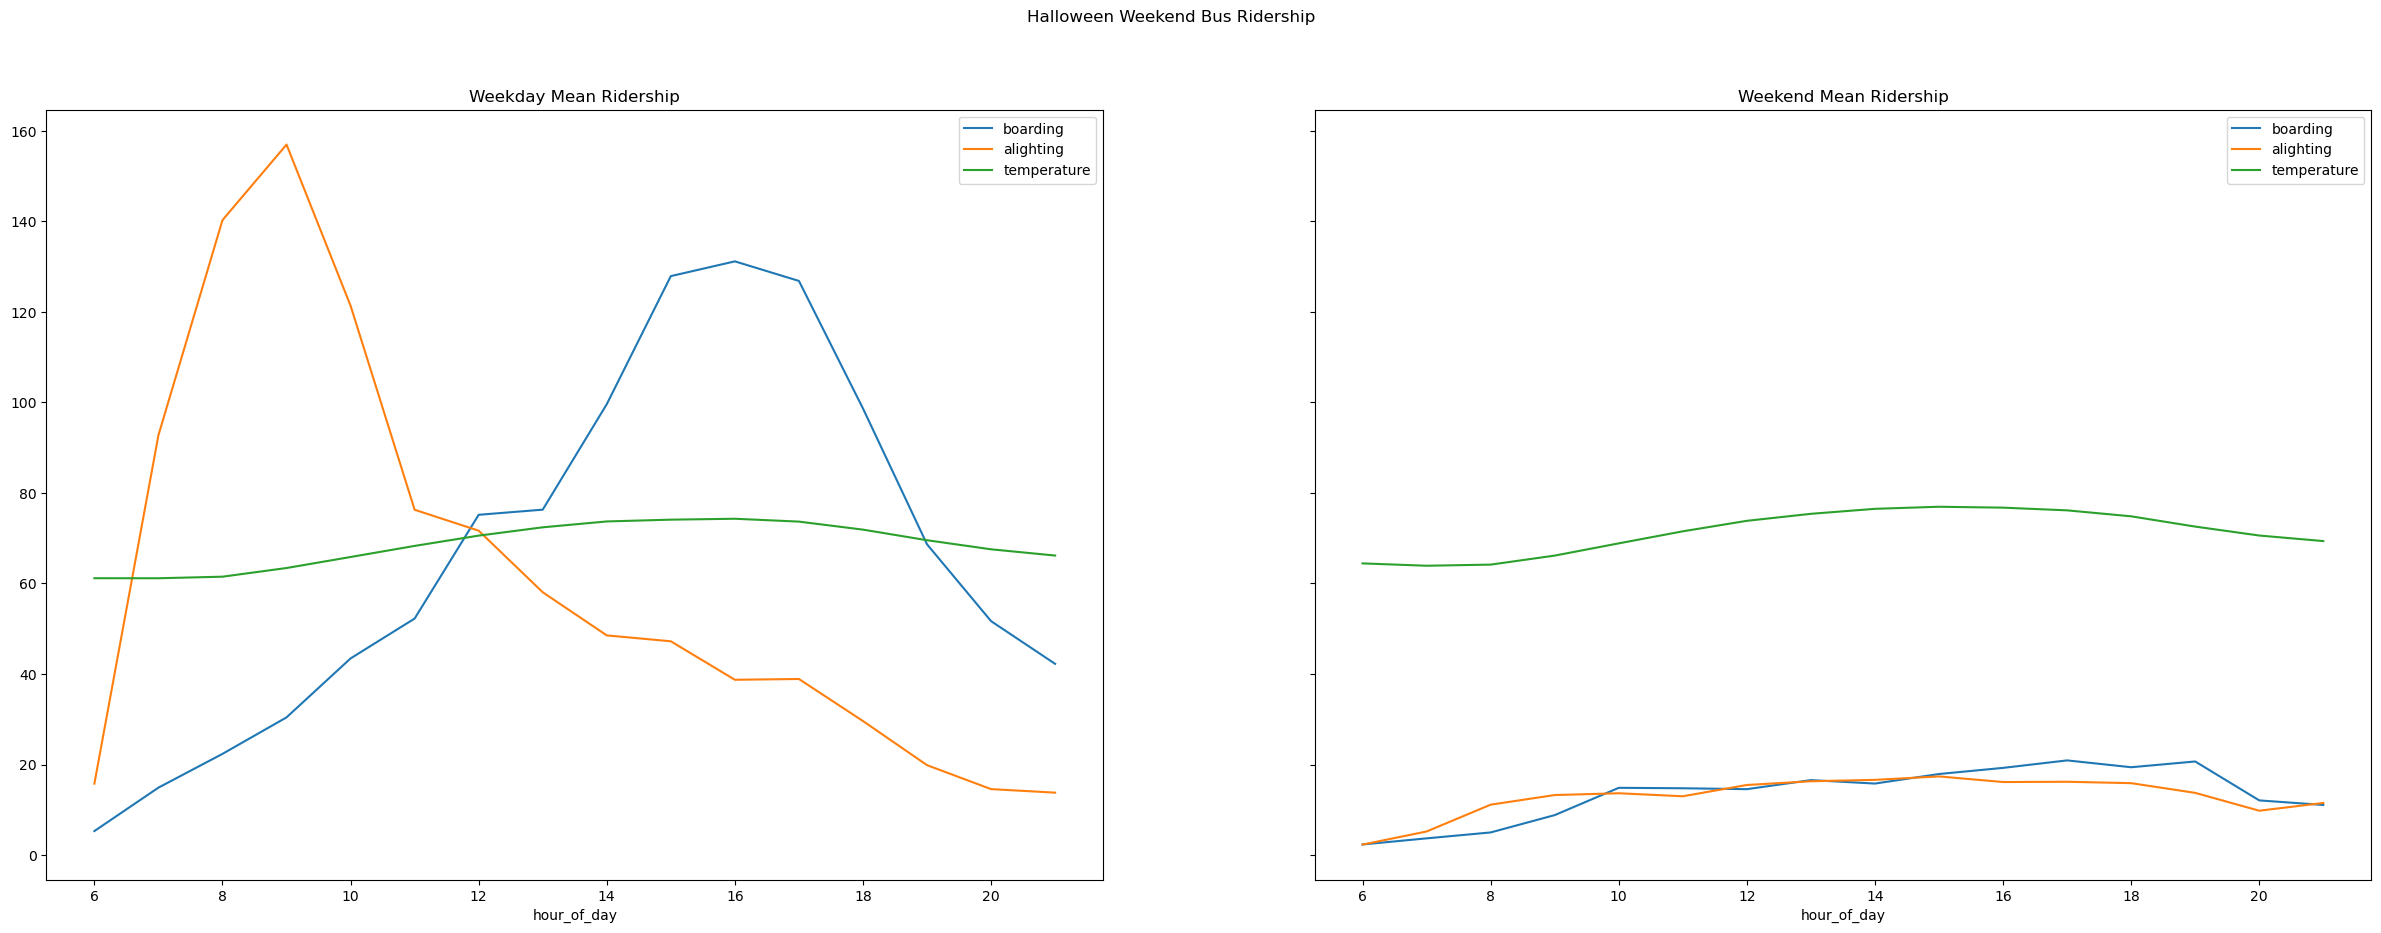

In [6]:
fig_1, (ax1, ax2) = subplots(nrows=1,
                           ncols=2,
                           sharey=True,
                           figsize=(30, 10))



weekday = cm_data[cm_data["weekend"] == "weekday"]
weekday.groupby("hour_of_day")[["boarding","alighting","temperature"]].mean().plot(title="Weekday Mean Ridership", ax=ax1)
weekend = cm_data[cm_data["weekend"] == "weekend"]
weekend.groupby("hour_of_day")[["boarding","alighting","temperature"]].mean().plot(title="Weekend Mean Ridership", ax=ax2)

fig_1.suptitle("Halloween Weekend Bus Ridership")

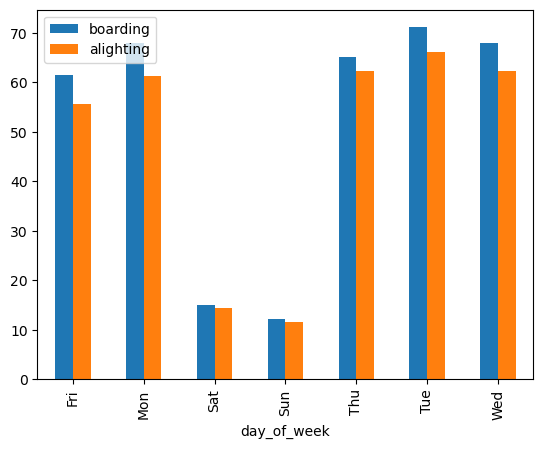

In [7]:

days_of_week = cm_data.groupby("day_of_week")[["boarding","alighting"]].mean().plot(kind="bar")